In [7]:
import requests
from bs4 import BeautifulSoup
from zipfile import ZipFile
import xml.etree.ElementTree as ET
from pathlib import Path
from pykml import parser
from fastkml import kml
import pandas as pd
import lxml.etree as et
from io import StringIO
from html.parser import HTMLParser

In [20]:
def webscrap():

    #URL = "https://buzzardsbay.org/enjoy-buzzards-bay/beach-information/"
    #page = requests.get(URL)
    #print(page.text)

    headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.12; rv:55.0) Gecko/20100101 Firefox/55.0',
    }
    URL = "https://buzzardsbay.org/enjoy-buzzards-bay/beach-information/"
    page = requests.get(URL, headers=headers)

    soup = BeautifulSoup(page.content, "html.parser")
    map_class = soup.find_all("div", class_="flxmap-container")
    #print(soup)
    map_id = soup.find(id="flxmap-617f4b62e1e1d")
    #print(map_id)
    #print(requests.get("https:\/\/buzzardsbay.org\/gis-data\/beaches_buzzards_bay_pts_2011.kmz", headers=headers))

    filename = '/Users/gupsb/Downloads/beaches_buzzards_bay_pts_2011.zip'

    kmz = ZipFile(filename, 'r')
    kml_file = Path(r'/Users/gupsb/Downloads/beaches_buzzards_bay_pts_2011/doc.kml')
    tree = ET.parse(kml_file)
    root = tree.getroot()
    with open(kml_file) as f:
        folder = parser.parse(f).getroot().Document.Folder

    plnm = []
    cordi = []
    use_category = []
    ownership = []
    town =[]
    acres = []
    check = True
    for pm in folder.Placemark:
        plnm1 = pm.name
        plcs1 = pm.Point.coordinates
        if check:
            desc_old = pm.description.text
            #print(desc_old)
            #for tables in et.HTML(desc_old).find("body/table/tr/td/table"):
                #print(tables)
            table = et.HTML(desc_old).find("body/table/tr/td/table")
            #print(table)
            rows = iter(table)
            headers = [col.text for col in next(rows)]
            #print(headers)
            for row in rows:
                values = [col.text for col in row]
                #print(values)
                if values[0] == 'OWNERSHIP':
                    ownership.append(values[1])
                elif values[0] == 'TOWN':
                    town.append(values[1])
                elif values[0] == 'USE_CATEGO':
                    use_category.append(values[1])
                elif values[0] == 'ACRES':
                        acres.append(values[1])

                
                #print (dict(zip(headers, values)))
           
        plnm.append(plnm1.text)
        cordi.append(plcs1.text)
        #meta_element=desc_old_tree_html.findall("head")[0].findall("Meta")[0]
    #print(plnm)
    #print(cordi)
    #print(access)
    db=pd.DataFrame()
    db['Beach Name']=plnm
    db['Coordinates']=cordi
    db['Town']=town
    db['Ownership']=ownership
    db['Accessibilty']=use_category
    db['Area']=acres
    
    return db
    

In [21]:
data = webscrap()

In [22]:
data

,Beach Name,Coordinates,Town,Ownership,Accessibilty,Area
0,Town Beach,"-70.80859986052559,41.65830356813273,0",Mattapoisett,Municipal,Municipal,0.944
1,Fort Phoenix Town,"-70.90262689513151,41.62419557821986,0",Fairhaven,Municipal,Municipal,1.241
2,Horseneck Beach,"-71.04870470650639,41.50275851563166,0",Westport,State,State,39.461
3,Demarest Lloyd State Park,"-70.98025037657065,41.527661939068,0",Dartmouth,State,State,9.056
4,Jones Beach,"-70.93097682532019,41.60506978809762,0",Dartmouth,Municipal,Municipal,2.044
...,...,...,...,...,...,...
93,Wood Neck River,"-70.63667983103267,41.5756967307811,0",Falmouth,Municipal,Municipal,5.832
94,Hamlin's Point Beach,"-70.64861873569222,41.56948654160055,0",Falmouth,Private,Semi-Public,2.223
95,Racing Beach,"-70.65418479760005,41.55400014874505,0",Falmouth,Association,Semi-Public,3.408
96,The Knob,"-70.65851179684259,41.54317779866575,0",Falmouth,Private,Semi-Public,1.075


In [61]:
data['Accessibilty'].unique()

array(['Municipal', 'State', 'Semi-Public', 'other', 'Special Note'],
      dtype=object)

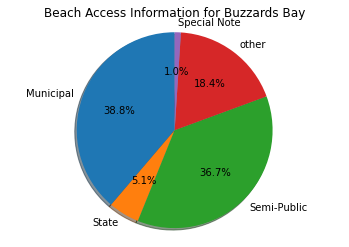

In [66]:
import matplotlib.pyplot as plt

unique_values = data['Accessibilty'].unique()
labels =[]
for i in range(len(data['Accessibilty'].unique())):
    labels.append(data['Accessibilty'].unique()[i])
sizes = []
for i in range(len(data['Accessibilty'].unique())):
    sizes.append(len(data[data['Accessibilty']==data['Accessibilty'].unique()[i]])/data.shape[0])
explode = (0,0,0,0,0)  # exploding not available information

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.title("Beach Access Information for Buzzards Bay")
plt.show()

### Reusing the code implemented in Deliverable 1 to merge the data

In [14]:
import pandas as pd
import numpy as np

filename = "Beach_Attributes.csv"

# Columns we are intrested in the dataset
fields = ['Beach Name', 'BeachLength (Mi)','Beach Access', 'County','Start Latitude', 'End Latitude', 'Start Longitude', 'End Longitude']

# Reads in the csv as a dataframe
df = pd.read_csv(filename, usecols = fields)
#df = pd.read_csv(filename)
df

,Beach Name,County,Beach Access,BeachLength (Mi),Start Latitude,Start Longitude,End Latitude,End Longitude
0,333 Commercial Street,BARNSTABLE,Public,0.085,42.051360,-70.184980,42.052280,-70.184000
1,451 Commercial Street,BARNSTABLE,Public,0.057,42.055200,-70.179860,42.055730,-70.179010
2,593 Commercial Street,BARNSTABLE,Public,0.022,42.059340,-70.170730,42.059460,-70.170330
3,637 Commercial Street,BARNSTABLE,Public,0.232,42.059930,-70.168540,42.060880,-70.164200
4,915 Craigville Road,BARNSTABLE,NaN,0.114,41.635864,-70.335649,41.636289,-70.337836
...,...,...,...,...,...,...,...,...
893,Short (DCR),SUFFOLK,Public,0.268,42.393940,-70.981780,42.390450,-70.979810
894,Spectacle Island (DCR),SUFFOLK,Public,0.127,42.320100,-70.987900,42.319400,-70.985800
895,Tenean (DCR),SUFFOLK,Public,0.144,42.293410,-71.044110,42.291800,-71.042400
896,Winthrop (DCR),SUFFOLK,Public,1.040,42.384010,-70.972280,42.369700,-70.967300


### Results of merged data from both the datasets

In [70]:
# This will add a column to df with the accessibility scraped from dataset 1
df_final = pd.merge(df, data, on = "Beach Name")
display(df_final[['Beach Name','Accessibilty','Town','County','Ownership','BeachLength (Mi)','Area']])


,Beach Name,Accessibilty,Town,County,Ownership,BeachLength (Mi),Area
0,Wood Neck Beach,Municipal,Falmouth,BARNSTABLE,Municipal,0.108,8.792
1,Wood Neck River,Municipal,Falmouth,BARNSTABLE,Municipal,0.086,5.832
2,Anthony Beach,Semi-Public,Dartmouth,BRISTOL,Association,0.159,1.314
3,Barney's Joy,Semi-Public,Dartmouth,BRISTOL,Private,0.922,32.457
4,East Beach,Municipal,New Bedford,BRISTOL,Municipal,0.273,6.501
5,East Beach,Municipal,Westport,BRISTOL,Municipal,0.273,3.613
6,Hidden Bay,Semi-Public,Dartmouth,BRISTOL,Private,0.069,0.937
7,Nonquitt,Semi-Public,Dartmouth,BRISTOL,Private,0.340,4.606
8,Brant Beach,Semi-Public,Mattapoisett,PLYMOUTH,Private,0.070,1.896
9,Hamilton Beach,other,Wareham,PLYMOUTH,Association,0.360,3.868


### From the above data it is clear that beach names donot match in the two datasets. We need a more comprehensive approach to merge the data